# Simple implemntation of linear regression (for learning purpose)
Adapted from https://gist.github.com/mbernico/dd3f09269dece47e092d7f32d096624e

In [18]:
#import necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn import datasets
from IPython import display

In [19]:
def plot_data(data, weights): 
    """
    animating plot to visualize the optimization process
    """
    ax1.clear()
    ax1.scatter(data[:, 0], data[:, 1], marker='o', c='black')
    #Plot the results
    m = len(data)
    it = np.ones(shape=(m, 2))
    it[:, 1] = X
    result = it.dot(weights).flatten()
    plt.plot(data[:, 0], result)
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.1)

In [20]:
def compute_cost(X, y, weights):
    """
    Comput cost for linear regression
    """
    #Number of training samples
    m = len(y)

    predictions = X.dot(weights).flatten()
    sqErrors = (predictions - y) ** 2
    J = (1.0 / (2 * m)) * sqErrors.sum()
    return J

In [21]:
def gradient_descent(X, y, weights, alpha, num_iters):
    """
    Performs gradient descent to learn weights
    by taking num_items gradient steps with learning
    rate alpha
    """
    m = y.size
    J_history = np.zeros(shape=(num_iters, 1))

    for i in range(num_iters):

        predictions = X.dot(weights).flatten()

        errors_x1 = (predictions - y) * X[:, 0]
        errors_x2 = (predictions - y) * X[:, 1]

        weights[0][0] = weights[0][0] - alpha * (1.0 / m) * errors_x1.sum()
        weights[1][0] = weights[1][0] - alpha * (1.0 / m) * errors_x2.sum()

        J_history[i, 0] = compute_cost(X, y, weights)
        
        #in order to plot the line fit every 100 iterations
        if i%100==0:
            plot_data(data, weights)
        
    return weights, J_history

w_0 = [ 152.13348416], w_1 = [ 946.12655438]


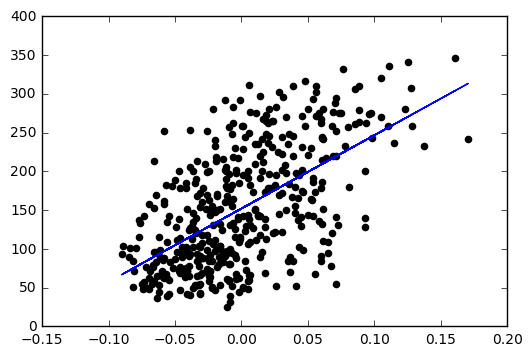

In [22]:
#load diabetes dataset from sklearn
diabetes = datasets.load_diabetes()
data = np.c_[diabetes.data[:,np.newaxis, 2],diabetes.target]
X = data[:, 0] #features (one feature)
y = data[:, 1] #target

#number of training samples
m = len(y)

#Add a column of ones to X (intercept data)
it = np.ones(shape=(m, 2))
it[:, 1] = X

#Initialize theta parameters to zeros
weights = np.zeros(shape=(2, 1))

#Some gradient descent settings
iterations = 5000
alpha = 0.5 #learning rate (important parameter)

#compute and display initial cost
print(compute_cost(it, y, weights))

#initialize the figure
fig = plt.figure()
ax1 = fig.add_subplot(111)
weights, J_history = gradient_descent(it, y, weights, alpha, iterations)

#print the final weights
print('w_0 = {}, w_1 = {}'.format(weights[0], weights[1]))